In [1]:
# Importar bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
from sklearn.metrics import confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [2]:
# Carregar os dados do MNIST (imagens de dígitos de 0 a 9)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

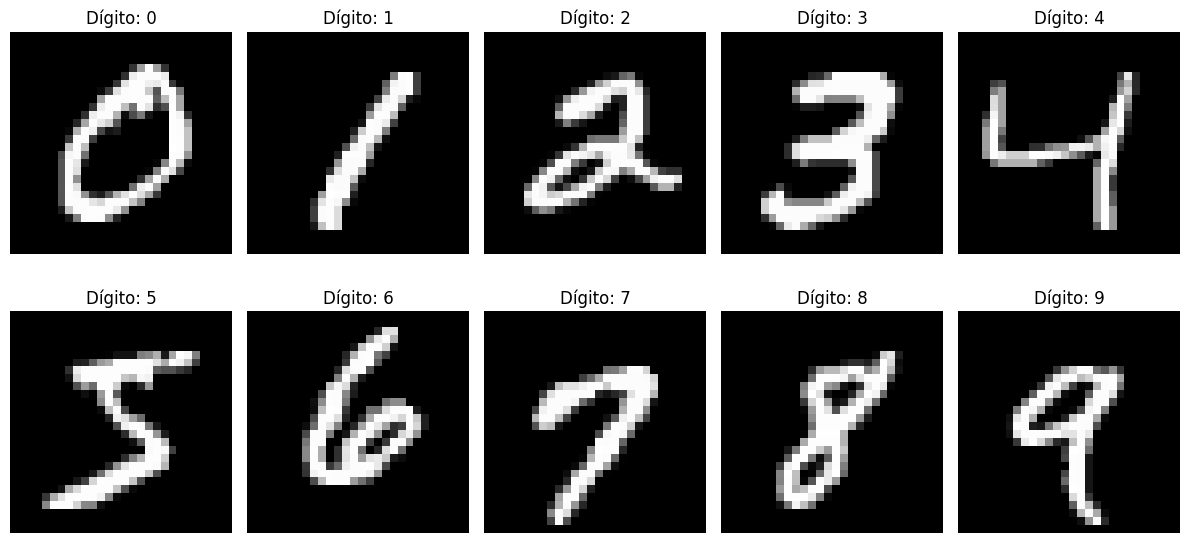

In [3]:
# Lista para armazenar os índices das primeiras ocorrências de cada dígito
indices = []

# Encontrar os índices das primeiras ocorrências dos dígitos de 0 a 9
for digit in range(10):
    idx = np.where(y_train == digit)[0][0]  # Obter o primeiro índice do dígito
    indices.append(idx)

# Exibir as 10 imagens correspondentes aos índices encontrados
plt.figure(figsize=(12, 6))
for i, idx in enumerate(indices):
    plt.subplot(2, 5, i + 1)  # Layout 2x5 para 10 imagens
    plt.imshow(x_train[idx], cmap="gray")  # Exibir a imagem do dígito
    plt.title(f"Dígito: {y_train[idx]}")  # Corrigir o título para o rótulo correto
    plt.axis("off")  # Remover os eixos

plt.tight_layout()  # Ajustar o layout para evitar sobreposição
plt.show()

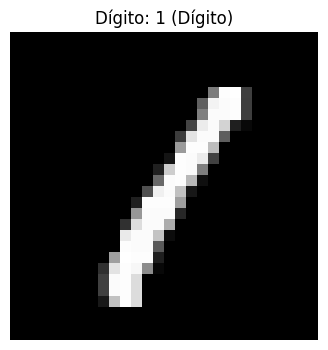

Valores dos pixels do dígito (28x28):
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  124 253 255  63   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  96
  244 251 253  62   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 127
  251 251 253  62   0   0   0   0   0   0]
 [  0   0   0   0   0   0 

In [4]:
idx_digit = indices[1]
digit_image = x_train[idx_digit]

# Exibir a imagem do dígito
plt.figure(figsize=(4, 4))
plt.imshow(digit_image, cmap="gray")
plt.title(f"Dígito: {y_train[idx_digit]} (Dígito)")
plt.axis("off")  # Remover os eixos
plt.show()

# Imprimir os valores numéricos dos pixels
print("Valores dos pixels do dígito (28x28):")
print(digit_image)

In [5]:
# Dividir os dados de treino em treino e validação
X_train = x_train[0:50000] / 255.0  # Normalizar os dados para o intervalo [0, 1]
Y_train = to_categorical(y_train[0:50000], 10)  # One-hot encoding para os rótulos

X_val = x_train[50000:60000] / 255.0  # Dados de validação
Y_val = to_categorical(y_train[50000:60000], 10)

X_test = x_test / 255.0  # Normalizar os dados de teste
Y_test = to_categorical(y_test, 10)

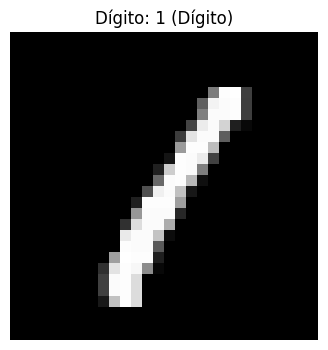

Valores dos pixels do dígito (28x28):
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.    

In [6]:
idx_digit = indices[1]
digit_image = X_train[idx_digit]

# Exibir a imagem do dígito
plt.figure(figsize=(4, 4))
plt.imshow(digit_image, cmap="gray")
plt.title(f"Dígito: {y_train[idx_digit]} (Dígito)")
plt.axis("off")  # Remover os eixos
plt.show()

# Imprimir os valores numéricos dos pixels
print("Valores dos pixels do dígito (28x28):")
print(digit_image)

In [7]:
# Ajustar os dados para o formato esperado pelos modelos CNN (matrizes 4D)
X_train = np.reshape(X_train, (X_train.shape[0], 28, 28, 1))
X_val = np.reshape(X_val, (X_val.shape[0], 28, 28, 1))
X_test = np.reshape(X_test, (X_test.shape[0], 28, 28, 1))

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(50000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 28, 28, 1)


In [25]:
# Função para embaralhar os pixels da imagem
def shuffel_pixels(idx, data):
    data_new = np.zeros(data.shape)
    for i, img in enumerate(data):
        data_new[i] = img.flatten()[idx].reshape((28, 28, 1))
    return data_new

In [26]:
# Função para plotar gráficos de acurácia e loss
def plot_metrics(history, title_suffix=""):
    plt.figure(figsize=(12, 5))
    
    # Plotar acurácia
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Treinamento')
    plt.plot(history.history['val_accuracy'], label='Validação')
    plt.title(f"Acurácia x Épocas {title_suffix}")
    plt.xlabel("Épocas")
    plt.ylabel("Acurácia")
    plt.legend()
    
    # Plotar perda (loss)
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Treinamento')
    plt.plot(history.history['val_loss'], label='Validação')
    plt.title(f"Loss x Épocas {title_suffix}")
    plt.xlabel("Épocas")
    plt.ylabel("Loss")
    plt.legend()
    
    plt.tight_layout()
    plt.show()

In [27]:
# Função para imprimir a matriz de confusão
def print_confusion_matrix(y_true, y_pred, title="Matriz de Confusão"):
    conf_matrix = confusion_matrix(y_true, y_pred)
    print(title)
    print(conf_matrix)

In [28]:
# Gerar índices embaralhados para embaralhar os pixels
np.random.seed(42)
shuffel_idx = np.random.permutation(np.arange(28 * 28))

In [29]:
# Embaralhar os dados de treino, validação e teste
X_train_shuffle = shuffel_pixels(shuffel_idx, X_train)
X_val_shuffle = shuffel_pixels(shuffel_idx, X_val)
X_test_shuffle = shuffel_pixels(shuffel_idx, X_test)

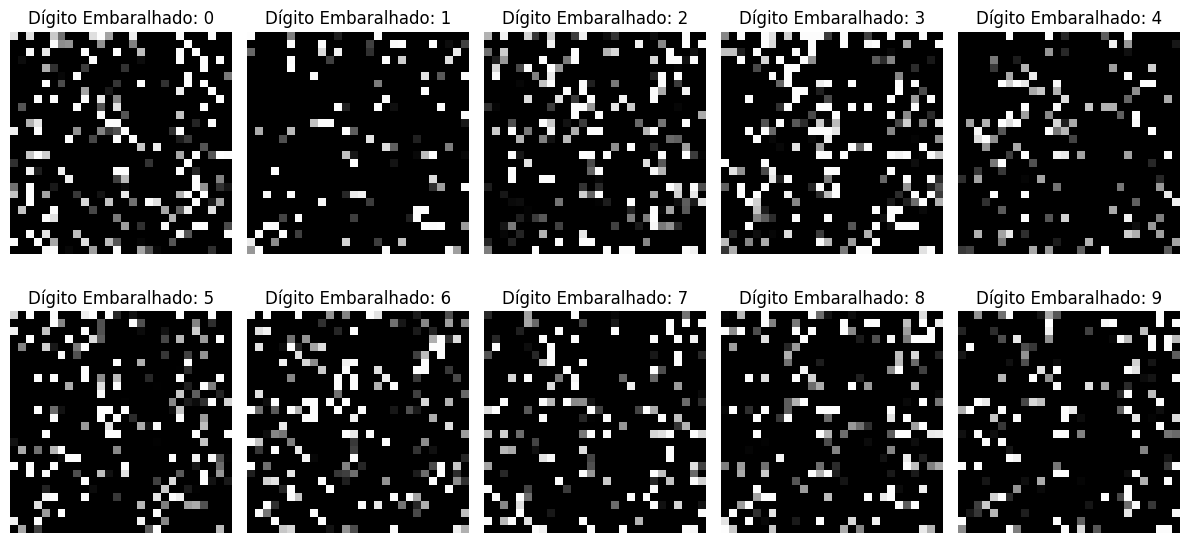

In [30]:
# Lista para armazenar os índices das primeiras ocorrências de cada dígito
indices = []

# Encontrar os índices das primeiras ocorrências dos dígitos de 0 a 9
for digit in range(10):
    idx = np.where(y_train == digit)[0][0]  # Obter o primeiro índice do dígito
    indices.append(idx)

# Exibir as 10 imagens embaralhadas correspondentes aos índices encontrados
plt.figure(figsize=(12, 6))
for i, idx in enumerate(indices):
    plt.subplot(2, 5, i + 1)  # Layout 2x5 para 10 imagens
    plt.imshow(X_train_shuffle[idx].reshape(28, 28), cmap="gray")  # Mostrar a imagem embaralhada
    plt.title(f"Dígito Embaralhado: {y_train[idx]}")  # Título com o rótulo original
    plt.axis("off")  # Remover os eixos

plt.tight_layout()  # Ajustar o layout para evitar sobreposição
plt.show()

In [31]:
# Ajustar os dados para o formato vetorial necessário para as fcNNs (fully connected neural networks)
X_train_flat = X_train.reshape([X_train.shape[0], 784])
X_val_flat = X_val.reshape([X_val.shape[0], 784])
X_test_flat = X_test.reshape([X_test.shape[0], 784])

In [32]:
# Ajustar os dados embaralhados para o formato vetorial
X_train_shuffle_flat = X_train_shuffle.reshape([X_train_shuffle.shape[0], 784])
X_val_shuffle_flat = X_val_shuffle.reshape([X_val_shuffle.shape[0], 784])
X_test_shuffle_flat = X_test_shuffle.reshape([X_test_shuffle.shape[0], 784])

In [33]:
# Definir uma rede neural totalmente conectada (fcNN) com 2 camadas ocultas
model = Sequential()
model.add(Dense(100, input_shape=(784,)))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

c:\Users\zecro\OneDrive\Documents\GitHub\redes-neurais-fiap\.env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
# Compilar o modelo
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [35]:
# Treinar a fcNN nos dados originais
history = model.fit(X_train_flat, Y_train, 
                    batch_size=128, 
                    epochs=10,
                    verbose=2, 
                    validation_data=(X_val_flat, Y_val))

Epoch 1/10
391/391 - 1s - 4ms/step - accuracy: 0.7975 - loss: 0.9336 - val_accuracy: 0.9079 - val_loss: 0.3721
Epoch 2/10
391/391 - 1s - 2ms/step - accuracy: 0.9129 - loss: 0.3258 - val_accuracy: 0.9270 - val_loss: 0.2563
Epoch 3/10
391/391 - 1s - 2ms/step - accuracy: 0.9318 - loss: 0.2434 - val_accuracy: 0.9430 - val_loss: 0.2043
Epoch 4/10
391/391 - 1s - 2ms/step - accuracy: 0.9438 - loss: 0.1975 - val_accuracy: 0.9516 - val_loss: 0.1730
Epoch 5/10
391/391 - 1s - 2ms/step - accuracy: 0.9527 - loss: 0.1650 - val_accuracy: 0.9563 - val_loss: 0.1523
Epoch 6/10
391/391 - 1s - 2ms/step - accuracy: 0.9596 - loss: 0.1410 - val_accuracy: 0.9608 - val_loss: 0.1387
Epoch 7/10
391/391 - 1s - 2ms/step - accuracy: 0.9655 - loss: 0.1211 - val_accuracy: 0.9638 - val_loss: 0.1262
Epoch 8/10
391/391 - 1s - 2ms/step - accuracy: 0.9705 - loss: 0.1051 - val_accuracy: 0.9648 - val_loss: 0.1177
Epoch 9/10
391/391 - 1s - 2ms/step - accuracy: 0.9740 - loss: 0.0918 - val_accuracy: 0.9681 - val_loss: 0.1080
E

Estrutura da Matriz de Confusão
Linhas: Representam as classes reais (rótulos verdadeiros) dos dígitos.
Colunas: Representam as classes preditas (saídas do modelo).

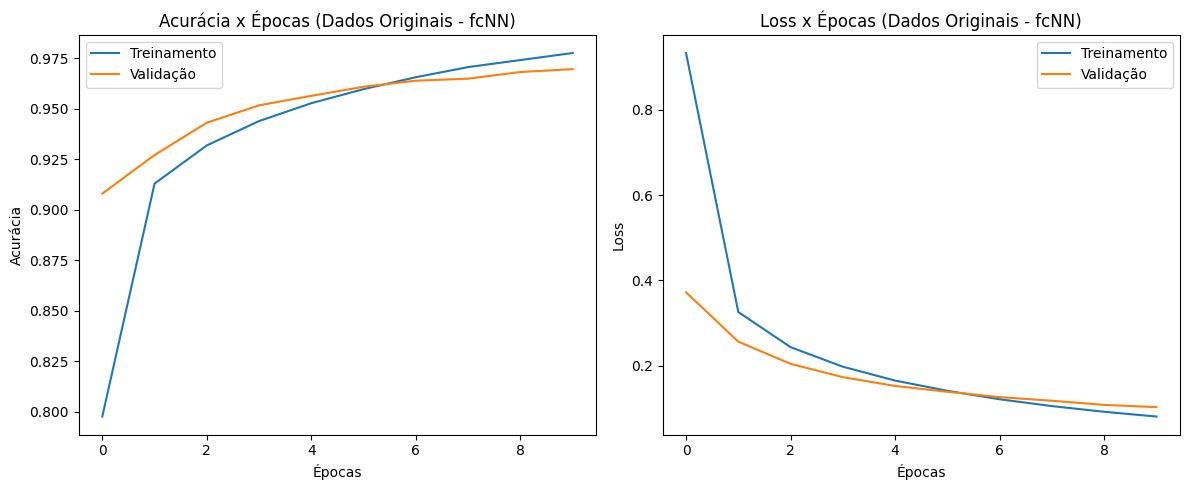

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step
Matriz de Confusão - fcNN (Dados Originais)
[[ 973    0    0    1    0    1    2    2    1    0]
 [   0 1125    3    0    0    1    3    0    3    0]
 [   8    2 1001    3    2    0    3    7    5    1]
 [   2    0    5  985    0    3    0    9    5    1]
 [   2    0    3    1  947    0    6    2    2   19]
 [   5    1    0   12    2  851    6    3    7    5]
 [   7    3    2    0    3    5  934    0    4    0]
 [   2    7   10    3    0    0    0  997    0    9]
 [   6    0    2   16    3    6    4    5  929    3]
 [   7    7    0   11   12    3    1   10    3  955]]


In [36]:
# Plotar métricas e imprimir matriz de confusão (dados originais)
plot_metrics(history, title_suffix="(Dados Originais - fcNN)")
pred = model.predict(X_test_flat)
y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(Y_test, axis=1)
print_confusion_matrix(y_true, y_pred, title="Matriz de Confusão - fcNN (Dados Originais)")

In [20]:
# Avaliar o modelo nos dados de teste originais
pred = model.predict(X_test_flat)
acc_fc_orig = np.sum(np.argmax(Y_test, axis=1) == np.argmax(pred, axis=1)) / len(pred)
print("Acurácia com dados originais (fcNN):", acc_fc_orig)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Acurácia com dados originais (fcNN): 0.9704


In [37]:
# Definir uma rede neural totalmente conectada (fcNN) com 2 camadas ocultas
model = Sequential()
model.add(Dense(100, input_shape=(784,)))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

c:\Users\zecro\OneDrive\Documents\GitHub\redes-neurais-fiap\.env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
# Compilar o modelo
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [39]:
history = model.fit(X_train_shuffle_flat, Y_train, 
                    batch_size=128, 
                    epochs=10,
                    verbose=2, 
                    validation_data=(X_val_shuffle_flat, Y_val))

Epoch 1/10
391/391 - 1s - 4ms/step - accuracy: 0.7802 - loss: 1.0073 - val_accuracy: 0.9084 - val_loss: 0.3937
Epoch 2/10
391/391 - 1s - 2ms/step - accuracy: 0.9139 - loss: 0.3318 - val_accuracy: 0.9303 - val_loss: 0.2516
Epoch 3/10
391/391 - 1s - 2ms/step - accuracy: 0.9321 - loss: 0.2413 - val_accuracy: 0.9440 - val_loss: 0.2047
Epoch 4/10
391/391 - 1s - 2ms/step - accuracy: 0.9441 - loss: 0.1955 - val_accuracy: 0.9525 - val_loss: 0.1730
Epoch 5/10
391/391 - 1s - 2ms/step - accuracy: 0.9524 - loss: 0.1647 - val_accuracy: 0.9585 - val_loss: 0.1522
Epoch 6/10
391/391 - 1s - 2ms/step - accuracy: 0.9594 - loss: 0.1411 - val_accuracy: 0.9607 - val_loss: 0.1374
Epoch 7/10
391/391 - 1s - 2ms/step - accuracy: 0.9642 - loss: 0.1227 - val_accuracy: 0.9639 - val_loss: 0.1257
Epoch 8/10
391/391 - 1s - 2ms/step - accuracy: 0.9696 - loss: 0.1076 - val_accuracy: 0.9671 - val_loss: 0.1175
Epoch 9/10
391/391 - 1s - 2ms/step - accuracy: 0.9735 - loss: 0.0943 - val_accuracy: 0.9675 - val_loss: 0.1100
E

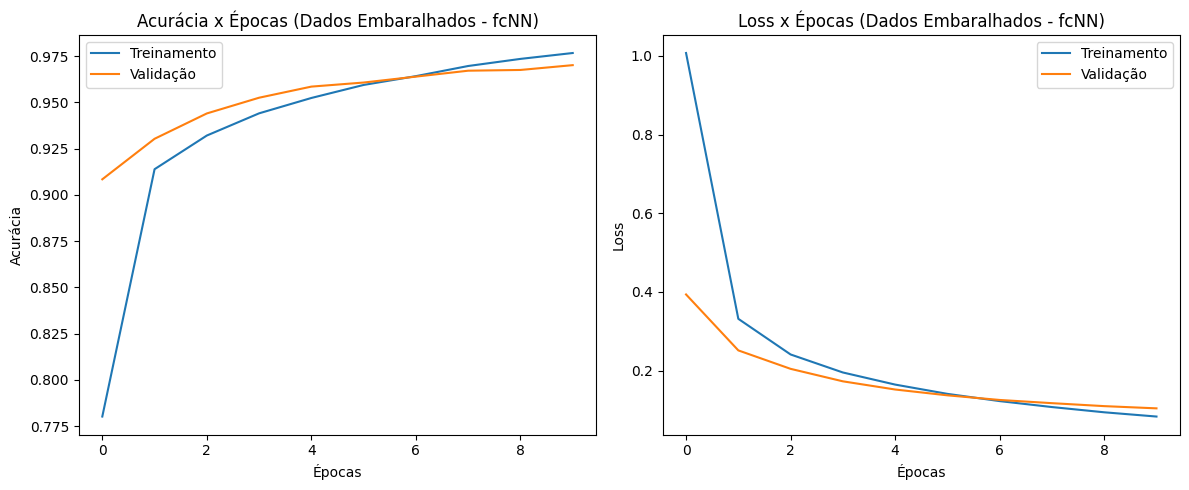

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step
Matriz de Confusão - fcNN (Dados Embaralhados)
[[ 968    0    1    0    0    2    6    2    1    0]
 [   0 1124    1    1    0    1    3    2    3    0]
 [   5    3  992    6    4    2    5    8    7    0]
 [   0    0    4  991    1    2    0    6    6    0]
 [   2    0    2    1  953    0    6    3    2   13]
 [   4    1    1   10    3  854    8    2    5    4]
 [   6    2    0    2    6    5  933    0    4    0]
 [   0    8   11    3    0    1    0 1002    0    3]
 [   4    3    3   12    4    6    7    6  926    3]
 [   5    6    0   11   18    5    1    9    4  950]]


In [40]:
# Plotar métricas e imprimir matriz de confusão (dados embaralhados)
plot_metrics(history, title_suffix="(Dados Embaralhados - fcNN)")
pred = model.predict(X_test_shuffle_flat)
y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(Y_test, axis=1)
print_confusion_matrix(y_true, y_pred, title="Matriz de Confusão - fcNN (Dados Embaralhados)")

In [25]:
# Avaliar o modelo nos dados de teste embaralhados
pred = model.predict(X_test_shuffle_flat)
acc_fc_shuffle = np.sum(np.argmax(Y_test, axis=1) == np.argmax(pred, axis=1)) / len(pred)
print("Acurácia com dados embaralhados (fcNN):", acc_fc_shuffle)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Acurácia com dados embaralhados (fcNN): 0.969


In [41]:
# Definir uma CNN para trabalhar com dados organizados espacialmente
model = Sequential()
model.add(Convolution2D(8, (3, 3), padding='same', input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(Convolution2D(8, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(16, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Convolution2D(16, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(40))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

c:\Users\zecro\OneDrive\Documents\GitHub\redes-neurais-fiap\.env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [43]:
# Treinar a CNN nos dados originais
history = model.fit(X_train, Y_train, 
                    batch_size=128, 
                    epochs=10,
                    verbose=2, 
                    validation_data=(X_val, Y_val))

Epoch 1/10
391/391 - 5s - 13ms/step - accuracy: 0.9015 - loss: 0.3497 - val_accuracy: 0.9727 - val_loss: 0.1011
Epoch 2/10
391/391 - 3s - 9ms/step - accuracy: 0.9724 - loss: 0.0889 - val_accuracy: 0.9814 - val_loss: 0.0678
Epoch 3/10
391/391 - 3s - 8ms/step - accuracy: 0.9801 - loss: 0.0651 - val_accuracy: 0.9799 - val_loss: 0.0690
Epoch 4/10
391/391 - 3s - 9ms/step - accuracy: 0.9835 - loss: 0.0530 - val_accuracy: 0.9848 - val_loss: 0.0535
Epoch 5/10
391/391 - 3s - 9ms/step - accuracy: 0.9854 - loss: 0.0449 - val_accuracy: 0.9842 - val_loss: 0.0580
Epoch 6/10
391/391 - 3s - 9ms/step - accuracy: 0.9882 - loss: 0.0373 - val_accuracy: 0.9869 - val_loss: 0.0459
Epoch 7/10
391/391 - 3s - 8ms/step - accuracy: 0.9901 - loss: 0.0316 - val_accuracy: 0.9827 - val_loss: 0.0596
Epoch 8/10
391/391 - 3s - 8ms/step - accuracy: 0.9899 - loss: 0.0300 - val_accuracy: 0.9878 - val_loss: 0.0462
Epoch 9/10
391/391 - 3s - 8ms/step - accuracy: 0.9917 - loss: 0.0256 - val_accuracy: 0.9876 - val_loss: 0.0474


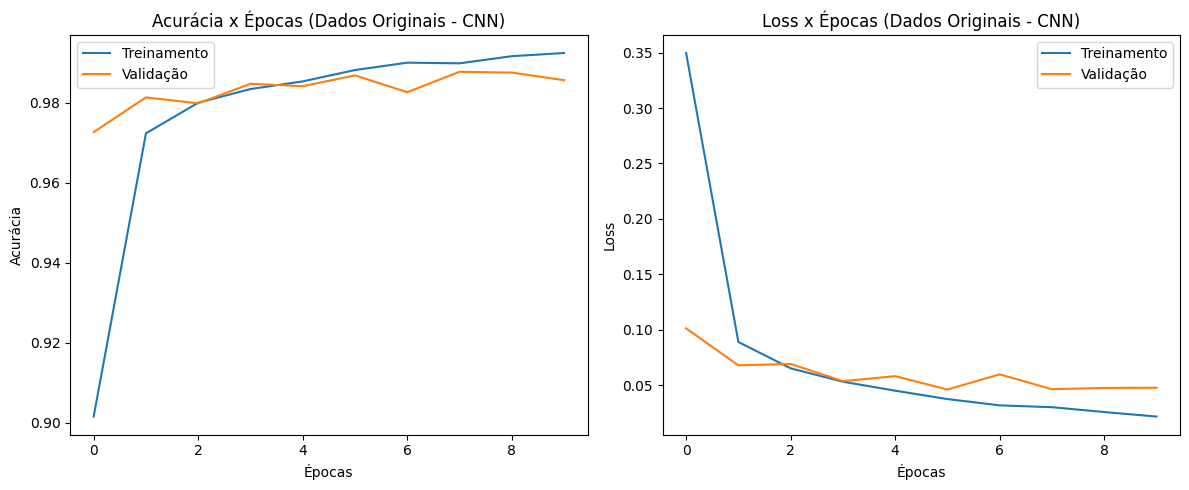

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Matriz de Confusão - CNN (Dados Originais)
[[ 971    0    0    1    0    3    4    0    1    0]
 [   0 1128    2    3    0    0    1    0    1    0]
 [   2    1 1015   12    0    0    0    1    0    1]
 [   0    0    0 1002    0    8    0    0    0    0]
 [   1    0    1    0  973    0    1    0    1    5]
 [   0    0    0    5    0  886    0    0    1    0]
 [   1    1    0    1    1    7  946    0    1    0]
 [   1    2   11    9    0    0    0  988    1   16]
 [   1    0    3   10    0    1    0    2  953    4]
 [   0    1    1    4    4    8    1    0    4  986]]


In [44]:
# Plotar métricas e imprimir matriz de confusão (dados originais)
plot_metrics(history, title_suffix="(Dados Originais - CNN)")
pred = model.predict(X_test)
y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(Y_test, axis=1)
print_confusion_matrix(y_true, y_pred, title="Matriz de Confusão - CNN (Dados Originais)")

In [45]:
# Avaliar a CNN nos dados originais
pred = model.predict(X_test)
acc_cnn = np.sum(np.argmax(Y_test, axis=1) == np.argmax(pred, axis=1)) / len(pred)
print("Acurácia com CNN (dados originais):", acc_cnn)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Acurácia com CNN (dados originais): 0.9848


In [46]:
# Treinar a CNN nos dados embaralhados
history = model.fit(X_train_shuffle, Y_train, 
                    batch_size=128, 
                    epochs=10,
                    verbose=2, 
                    validation_data=(X_val_shuffle, Y_val))

Epoch 1/10
391/391 - 3s - 9ms/step - accuracy: 0.8288 - loss: 0.5441 - val_accuracy: 0.9177 - val_loss: 0.2686
Epoch 2/10
391/391 - 3s - 9ms/step - accuracy: 0.9194 - loss: 0.2606 - val_accuracy: 0.9312 - val_loss: 0.2304
Epoch 3/10
391/391 - 4s - 9ms/step - accuracy: 0.9348 - loss: 0.2122 - val_accuracy: 0.9385 - val_loss: 0.2036
Epoch 4/10
391/391 - 3s - 7ms/step - accuracy: 0.9449 - loss: 0.1789 - val_accuracy: 0.9397 - val_loss: 0.1889
Epoch 5/10
391/391 - 3s - 7ms/step - accuracy: 0.9511 - loss: 0.1557 - val_accuracy: 0.9451 - val_loss: 0.1754
Epoch 6/10
391/391 - 3s - 8ms/step - accuracy: 0.9579 - loss: 0.1367 - val_accuracy: 0.9500 - val_loss: 0.1610
Epoch 7/10
391/391 - 3s - 8ms/step - accuracy: 0.9610 - loss: 0.1250 - val_accuracy: 0.9508 - val_loss: 0.1620
Epoch 8/10
391/391 - 3s - 7ms/step - accuracy: 0.9649 - loss: 0.1106 - val_accuracy: 0.9514 - val_loss: 0.1657
Epoch 9/10
391/391 - 3s - 7ms/step - accuracy: 0.9673 - loss: 0.1008 - val_accuracy: 0.9485 - val_loss: 0.1720
E

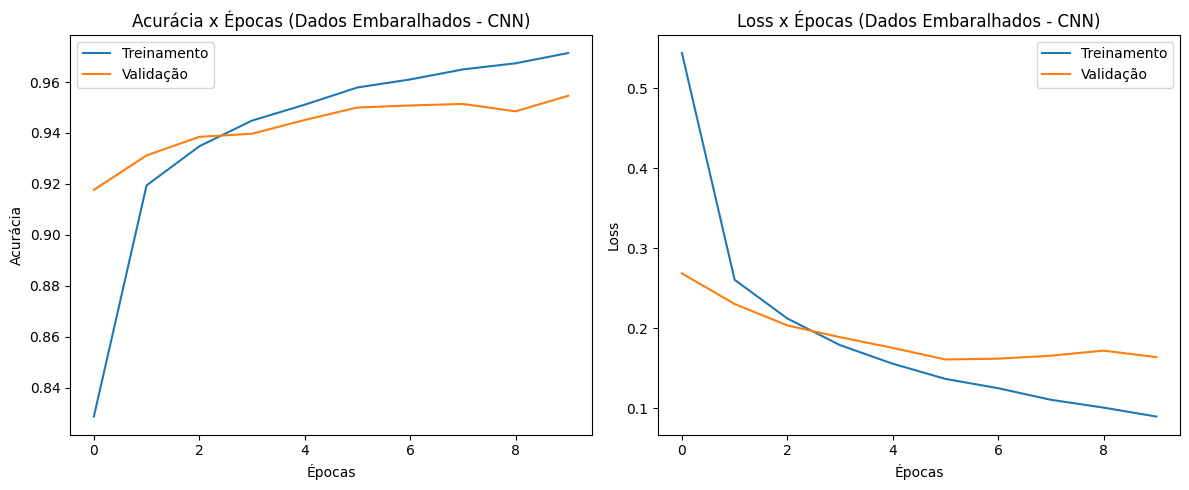

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Matriz de Confusão - CNN (Dados Embaralhados)
[[ 953    0    9    0    1    4    5    2    5    1]
 [   0 1114    5    3    0    0    1    1   10    1]
 [   6    5  980   16    1    2    3    6   11    2]
 [   0    1   10  958    1   19    2    4   12    3]
 [   2    0    9    4  928    3    5    5    2   24]
 [   6    1    1   26    5  838    4    2    7    2]
 [   7    2    9    0    5    8  919    1    6    1]
 [   2    8   20    5    4    1    0  967    4   17]
 [   2    0   14   19    4   17    3    4  907    4]
 [   2    6    6    9   19    8    0   10    8  941]]


In [47]:
# Plotar métricas e imprimir matriz de confusão (dados embaralhados)
plot_metrics(history, title_suffix="(Dados Embaralhados - CNN)")
pred = model.predict(X_test_shuffle)
y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(Y_test, axis=1)
print_confusion_matrix(y_true, y_pred, title="Matriz de Confusão - CNN (Dados Embaralhados)")

In [48]:
# Avaliar a CNN nos dados embaralhados
pred = model.predict(X_test_shuffle)
acc_cnn_shuffle = np.sum(np.argmax(Y_test, axis=1) == np.argmax(pred, axis=1)) / len(pred)
print("Acurácia com CNN (dados embaralhados):", acc_cnn_shuffle)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Acurácia com CNN (dados embaralhados): 0.9505
